# DSL test @advanced_DSL.py


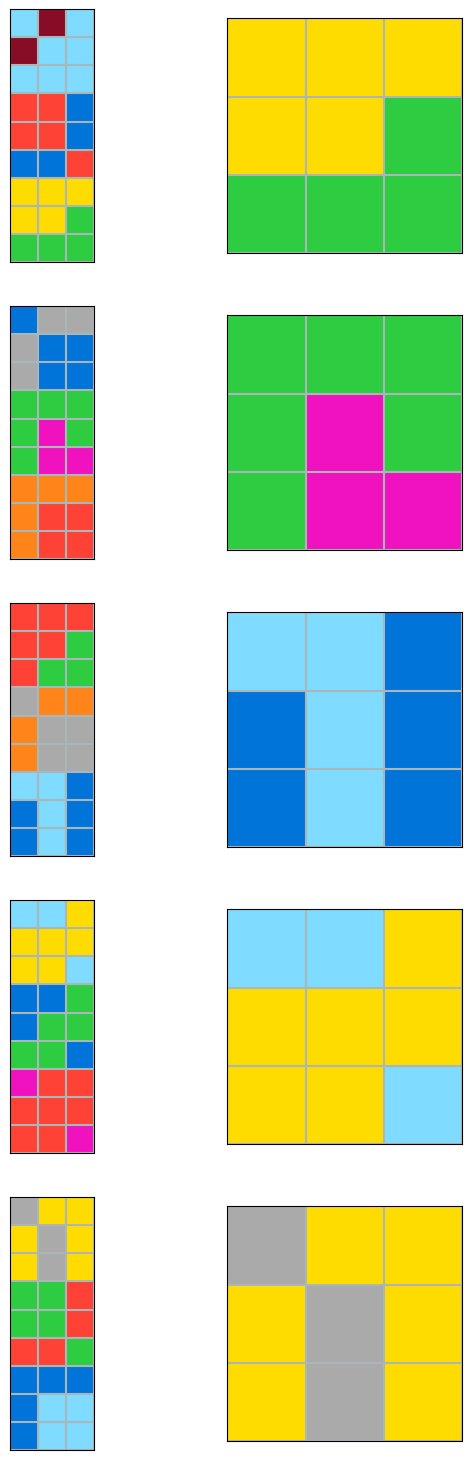

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import glob
from pathlib import Path

from basics.ARCLOADER import *
from basics.VISUALIZATION import *

from DSL.dsl import *
from DSL.dsl2 import *
from DSL.advanced_DSL import *
from DSL.hodel_utils import *

# from KG_definition.node import *
from KG_definition.new import *
from KG_definition.edge import *

from KG_construction.construction import *

arc = ARCDataset()
tasks, j_codes = arc.load_data(type = 'train', form = 'list', shuffle = False, jcode = True)

x = 24    # 0 - 399      (task number)
x = arc.jtoi('662c240a', j_codes)
tt = 0    # 0 or 1       (train or test)
p = 0     # 0 - max pair (pair number)
io = 0   # 0 or 1       (input or output)

example_task = tasks[x]
# example_pair = tasks[x][tt][p]
# example_grid = tasks[x][tt][p][io]

# plot_data(example_grid)
plot_data(example_task)
# plot_data(find_all_objects_sort_grid(example_grid), keyword = "objects")



[(0, (2, 2))]
[(0, (6, 5)), (0, (6, 6)), (0, (7, 5)), (0, (7, 6)), (0, (8, 5)), (0, (8, 6))]
[(2, (1, 1)), (2, (1, 2)), (2, (1, 3)), (2, (2, 1)), (2, (2, 3)), (2, (3, 1)), (2, (3, 2)), (2, (3, 3))]
[(2, (5, 4)), (2, (5, 5)), (2, (5, 6)), (2, (5, 7)), (2, (6, 4)), (2, (6, 7)), (2, (7, 4)), (2, (7, 7)), (2, (8, 4)), (2, (8, 7)), (2, (9, 4)), (2, (9, 5)), (2, (9, 6)), (2, (9, 7))]
[(0, (0, 0)), (0, (0, 1)), (0, (0, 2)), (0, (0, 3)), (0, (0, 4)), (0, (0, 5)), (0, (0, 6)), (0, (0, 7)), (0, (0, 8)), (0, (0, 9)), (0, (1, 0)), (0, (1, 4)), (0, (1, 5)), (0, (1, 6)), (0, (1, 7)), (0, (1, 8)), (0, (1, 9)), (0, (2, 0)), (0, (2, 4)), (0, (2, 5)), (0, (2, 6)), (0, (2, 7)), (0, (2, 8)), (0, (2, 9)), (0, (3, 0)), (0, (3, 4)), (0, (3, 5)), (0, (3, 6)), (0, (3, 7)), (0, (3, 8)), (0, (3, 9)), (0, (4, 0)), (0, (4, 1)), (0, (4, 2)), (0, (4, 3)), (0, (4, 4)), (0, (4, 5)), (0, (4, 6)), (0, (4, 7)), (0, (4, 8)), (0, (4, 9)), (0, (5, 0)), (0, (5, 1)), (0, (5, 2)), (0, (5, 3)), (0, (5, 8)), (0, (5, 9)), (0, (6,

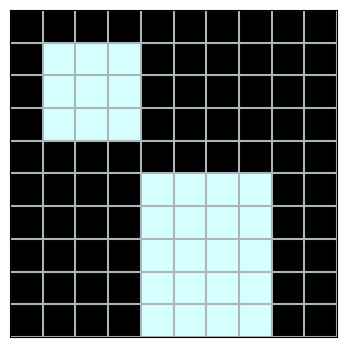

In [2]:
objs_colcoord = find_all_objects_sort(example_grid)
objs_grid = find_all_objects_sort_grid(example_grid)

forprint(objs_colcoord)
forprint(objs_grid)

plot_data(objs_grid[4])


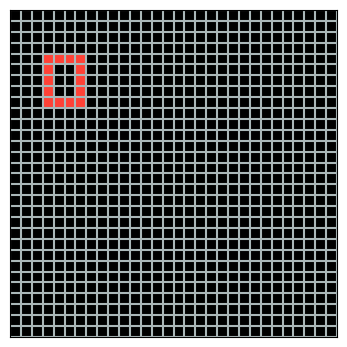

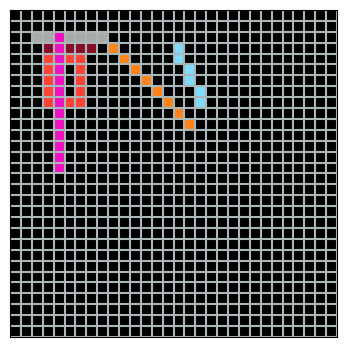

In [3]:
result = make_grid(30, 30, 0)
result = paste_object(result, objs_grid[3], 4, 3)
plot_data(result)

# result = cut_grid(result, 2, 2, 5, 9)
# plot_data(result)

result = make_line(result, 2, 2, 2, 8, 5, include_ends = True)
result = make_line(result, 3, 2, 3, 8, 9, include_ends = False)
result = make_line(result, 2, 4, 14, 4, 6, include_ends = True)
result = make_line(result, 3, 9, 10, 16, 7, include_ends = True)
result = make_line(result, 9, 18, 2, 14, 8, include_ends = False)
plot_data(result)

# result = cut_grid(result, 2, 2, 5, 9)
# plot_data(result)

# plot_data(find_all_objects_sort_grid(result), keyword = "objects")




## with nodes

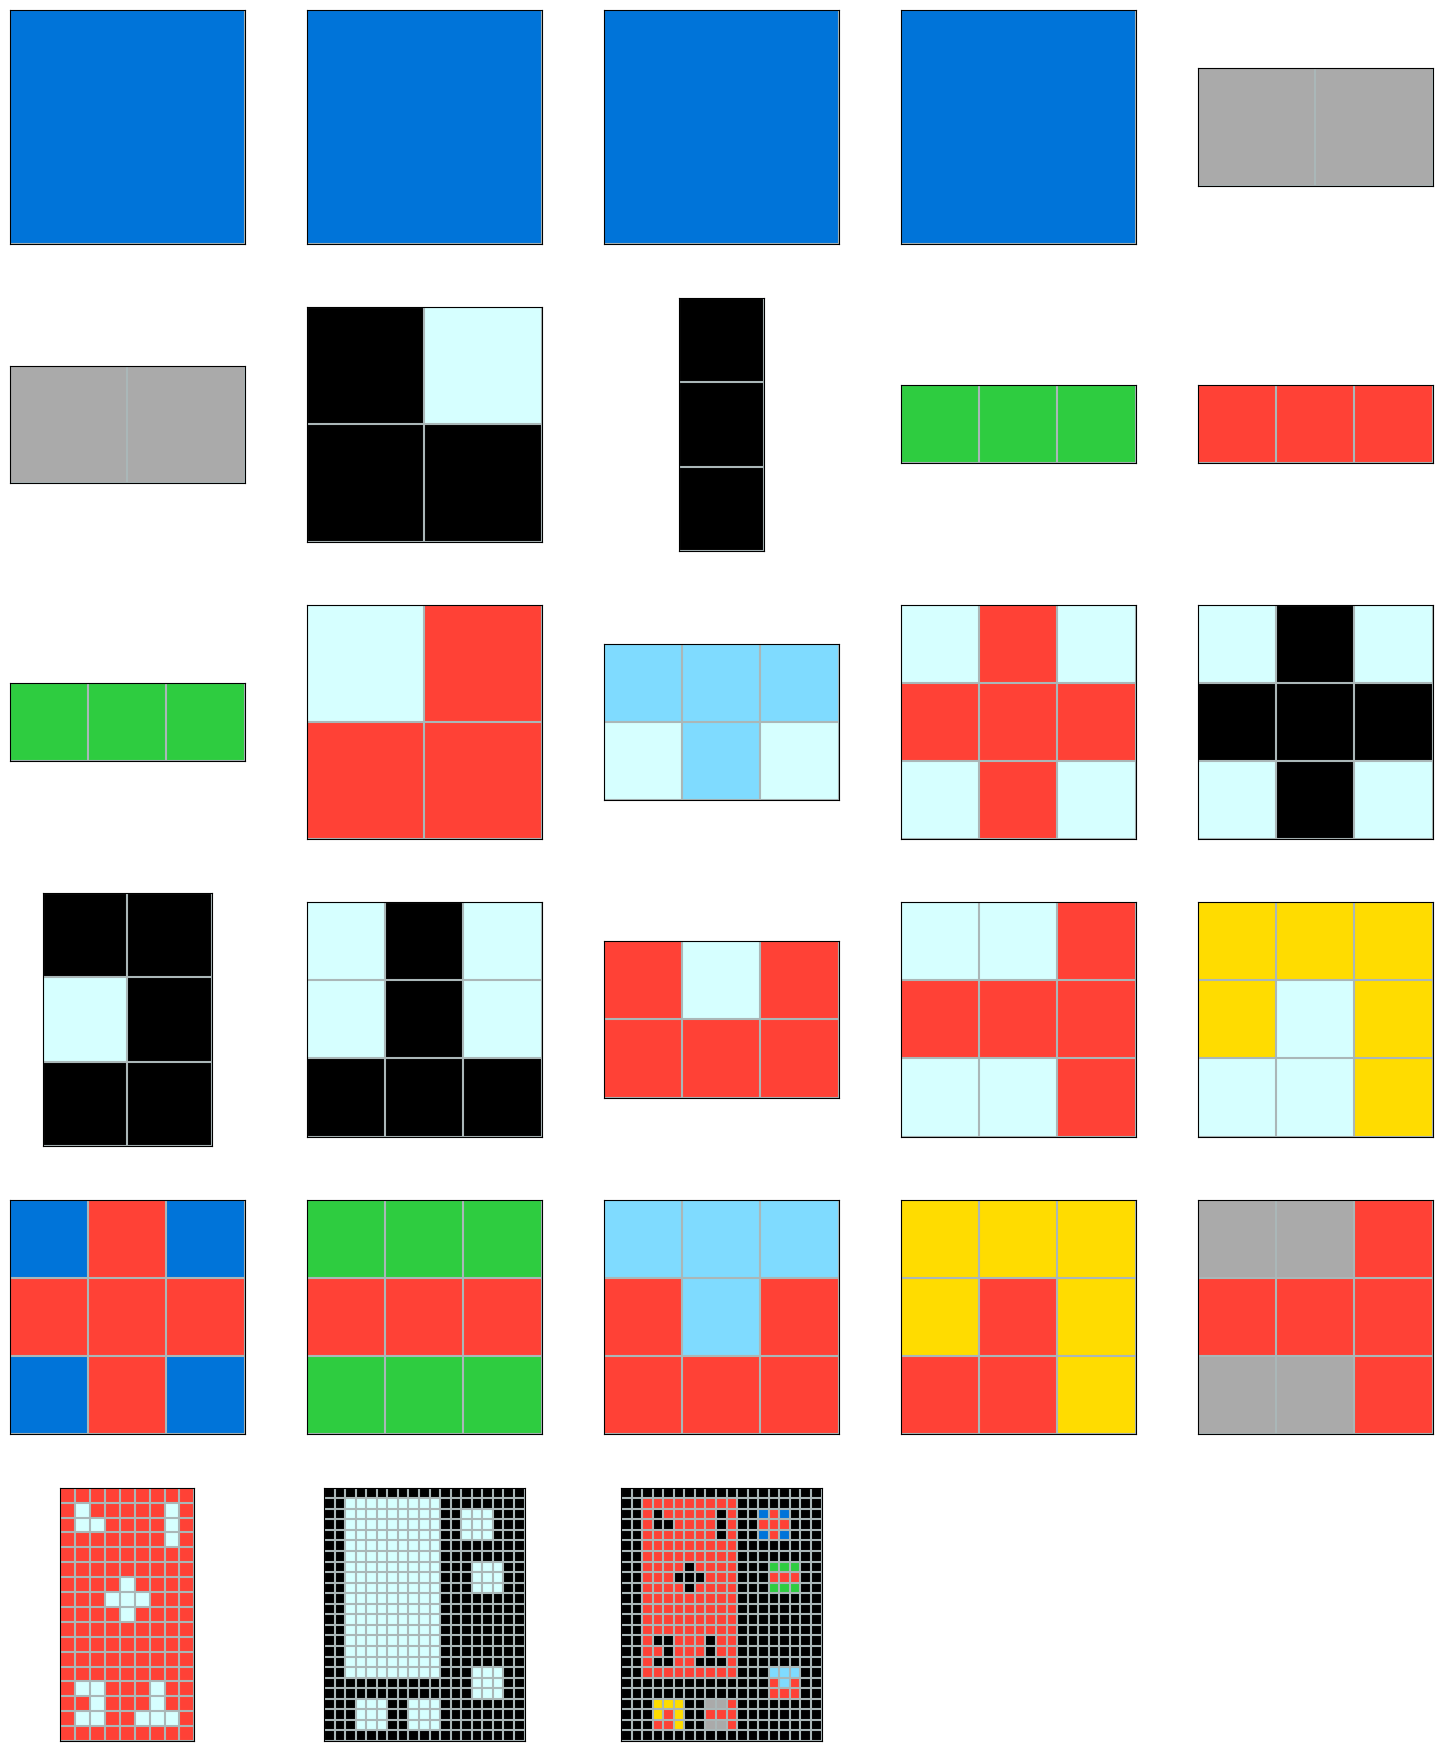

AttributeError: 'int' object has no attribute 'pair'

In [4]:
arc = ARCDataset()
tasks, j_codes = arc.load_data(type = 'train', form = 'list', shuffle = False, jcode = True)

x = 22    # 0 - 399      (task number)
x = arc.jtoi('97a05b5b', j_codes)
tt = 0    # 0 or 1       (train or test)
p = 0     # 0 - max pair (pair number)
io = 0   # 0 or 1       (input or output)

# example_task = tasks[x]
# example_pair = tasks[x][tt][p]
example_grid = tasks[x][tt][p][io]

# plot_data(example_grid)
plot_data(find_all_objects_sort_grid(example_grid), keyword = "objects")

# task
node_list = []

task = Task(tasks[x])
node_list.append(task)

# pair
for p in range(task.num_of_ex + task.num_of_test):
    if p < task.num_of_ex:
        tt = 0
        p = p
        pair = Pair(task, tt, p)
    else:
        tt = 1
        p = p - task.num_of_ex
        pair = Pair(task, tt, p)
    node_list.append(pair)

    # grid
    for io in range(2):
        grid = Grid(pair, tt, p, io)
        node_list.append(grid)

        # pixel
        for row in range(grid.height):
            for col in range(grid.width):
                pixel = Pixel(grid, row, col)
                node_list.append(pixel)

        # object
        for o in range(len(find_all_objects(grid.grid))):
            object = Object(grid, o, find_all_objects(grid.grid)[o])
            node_list.append(object)

# forprint(node_list)
for node in node_list:
    print(node.type, node)
# print(node_list[-3].size)